In [ ]:
# The topic of my research project is investigating the morphology of the 
# stellar remnant of the Milky Way + M31 major merger.

# Specifically, I will investigate the question of if the 3D structure of 
# the remnant is a spheroid or if it has some elongation or triaxiality.

# In this first attempt at the code, I will attempt to fit an ellipse to
# the remnant, extract the ellipse parameters from the fit in 3 different
# 2D projections of the remnant for snap number 595, and average them to
# estimate the 3D shape of the ellipse.

In [63]:
# import modules and previously made code

# general modules for 
import numpy as np # math
import matplotlib.pyplot as plt # plotting
import astropy.units as u # units
from matplotlib.colors import LogNorm # histograms
# previously made code for
from CenterOfMass2 import CenterOfMass # finding center of mass (from HW6)
from ContourFitting import density_contour # for plotting density contours (from Lab7)
from RotateFrame import RotateFrame # for aligning the galaxy's angular momentum with the z axis (Lab 7)
from GalaxyMass import ComponentMass # for finding the total disk and bulge masses

In [25]:
# make function to calculate COM of two COMs
def COM_of_COMs(COMvec1, COMvec2, M1, M2):
    ''' 
    Calculates the center of mass position or 
    velocity for two given centers of mass and
    the associated total masses.

    Parameters
    ----------
        COMvec1, COMvec2: `numpy array-like`
            the vectors associated with each
            center of mass respectively
        M1, M2: `astropy quantity`
            the masses associated with each
            center of mass (Msun)
    
    Returns
    -------
        COMvec_tot: `numpy array-like`
            the vector for the total
            center of mass
    '''
    # calculate total center of mass vector
    denom = M1+M2
    num = COMvec1*M1 + COMvec2*M2
    COMvec_tot = num / denom

    return COMvec_tot

In [ ]:
# find the disk+bulge COM of each galaxy individually
# choose voldec=2 for COM position determination for
# consistency with previous HWs
# 2 = disk, 3 = bulge

# use high-resolution snapshots 2 Gyr post-MW-M31 merger (snap number 595)

# MW first
# disk COM position, velocity & mass
MW_COM_disk = CenterOfMass('MW_595.txt', 2)
MW_COM_disk_p = MW_COM_disk.COM_P(2)
MW_COM_disk_v = MW_COM_disk.COM_V(MW_COM_disk_p[0], MW_COM_disk_p[1],
                                  MW_COM_disk_p[2])
MW_disk_M = ComponentMass('MW_595.txt', 'Disk')*1e12 # put it in units of Msun

# bulge COM position, velocity & mass
MW_COM_bulge = CenterOfMass('MW_595.txt', 3)
MW_COM_bulge_p = MW_COM_bulge.COM_P(2)
MW_COM_bulge_v = MW_COM_bulge.COM_V(MW_COM_bulge_p[0], MW_COM_bulge_p[1],
                                    MW_COM_bulge_p[2])
MW_bulge_M = ComponentMass('MW_595.txt', 'Bulge')*1e12

# calculate COM position & velocity of disk & bulge COMs & total baryonic mass
MW_COM_p = COM_of_COMs(MW_COM_disk_p, MW_COM_bulge_p, MW_disk_M, MW_bulge_M)
MW_COM_v = COM_of_COMs(MW_COM_disk_v, MW_COM_bulge_v, MW_disk_M, MW_bulge_M)
MW_M = MW_disk_M + MW_bulge_M

MW COM position: [100.63176471  88.87941176  75.30117647] kpc
MW COM velocity: [ 33.95941176 -24.80058824  31.30941176] km / s
MW total mass: 85000000000.0 solMass


In [35]:
# look at results
print(f'MW COM position: {MW_COM_p}')
print(f'MW COM velocity: {MW_COM_v}')
print(f'MW total mass: {MW_M:.2e}')

MW COM position: [100.63176471  88.87941176  75.30117647] kpc
MW COM velocity: [ 33.95941176 -24.80058824  31.30941176] km / s
MW total mass: 8.50e+10 solMass


In [27]:
# now M31
# disk COM position, velocity & mass
M31_COM_disk = CenterOfMass('M31_595.txt', 2)
M31_COM_disk_p = M31_COM_disk.COM_P(2)
M31_COM_disk_v = M31_COM_disk.COM_V(M31_COM_disk_p[0], M31_COM_disk_p[1],
                                  M31_COM_disk_p[2])
M31_disk_M = ComponentMass('M31_595.txt', 'Disk')*1e12 # put it in units of Msun

# bulge COM position, velocity & mass
M31_COM_bulge = CenterOfMass('M31_595.txt', 3)
M31_COM_bulge_p = M31_COM_bulge.COM_P(2)
M31_COM_bulge_v = M31_COM_bulge.COM_V(M31_COM_bulge_p[0], M31_COM_bulge_p[1],
                                    M31_COM_bulge_p[2])
M31_bulge_M = ComponentMass('M31_595.txt', 'Bulge')*1e12

# calculate COM position & velocity of disk & bulge COMs
M31_COM_p = COM_of_COMs(M31_COM_disk_p, M31_COM_bulge_p, M31_disk_M, M31_bulge_M)
M31_COM_v = COM_of_COMs(M31_COM_disk_v, M31_COM_bulge_v, M31_disk_M, M31_bulge_M)
M31_M = M31_disk_M + M31_bulge_M

In [36]:
print(f'M31 COM position: {M31_COM_p}')
print(f'M31 COM velocity: {M31_COM_v}')
print(f'M31 total mass: {M31_M:.2e}')

M31 COM position: [99.92381295 89.25985612 74.3842446 ] kpc
M31 COM velocity: [ 35.3452518  -27.07935252  31.92273381] km / s
M31 total mass: 1.39e+11 solMass


In [ ]:
# now calculate COM position & velocity of whole remnant
rem_COM_p = COM_of_COMs(MW_COM_p, M31_COM_p, MW_M, M31_M)
rem_COM_v = COM_of_COMs(MW_COM_v, M31_COM_v, MW_M, M31_M)

print(f'Remnant COM position: {rem_COM_p}')
print(f'Remnant COM velocity: {rem_COM_v}')
# it's closer to the position and velocity of M31, which makes sense
# although MW and M31 were already very close to each other (again, makes sense)

Remnant COM position: [100.19245536  89.11549107  74.7321875 ] kpc
Remnant COM velocity: [ 34.819375   -26.21464286  31.69      ] km / s


In [51]:
# "make" the remnant 

# concatenate MW and M31 bulge & disk arrays into one
# for position
# x, y, z individually for now
rem_x = np.concatenate((MW_COM_disk.x, MW_COM_bulge.x, 
                        M31_COM_disk.x, M31_COM_bulge.x),
                        axis=0)
rem_y = np.concatenate((MW_COM_disk.y, MW_COM_bulge.y, 
                        M31_COM_disk.y, M31_COM_bulge.y),
                        axis=0)
rem_z = np.concatenate((MW_COM_disk.z, MW_COM_bulge.z, 
                        M31_COM_disk.z, M31_COM_bulge.z),
                        axis=0)

# now subtract COM position from remnant position arrays
rem_x_rel = rem_x - rem_COM_p[0].value
rem_y_rel = rem_y - rem_COM_p[0].value
rem_z_rel = rem_z - rem_COM_p[0].value

# and get final remnant position array relative to its COM
rem_p_rel = np.array([rem_x_rel, rem_y_rel, rem_z_rel])*u.kpc

In [52]:
# do the same for velocity
# get individual vx, vy, viz
rem_vx = np.concatenate((MW_COM_disk.vx, MW_COM_bulge.vx, 
                        M31_COM_disk.vx, M31_COM_bulge.vx),
                        axis=0)
rem_vy = np.concatenate((MW_COM_disk.vy, MW_COM_bulge.vy, 
                        M31_COM_disk.vy, M31_COM_bulge.vy),
                        axis=0)
rem_vz = np.concatenate((MW_COM_disk.vz, MW_COM_bulge.vz, 
                        M31_COM_disk.vz, M31_COM_bulge.vz),
                        axis=0)

# get velocity components relative to COM
rem_vx_rel = rem_vx - rem_COM_v[0].value
rem_vy_rel = rem_vy - rem_COM_v[0].value
rem_vz_rel = rem_vz - rem_COM_v[0].value

# get total velocity array
rem_v_rel = np.array([rem_vx_rel, rem_vy_rel, rem_vz_rel])*u.km/u.s

In [57]:
# align the remnant's angular momentum with the z-axis
# this will allow me to look at it "edge-on" and "face-on"
rem_p, rem_v = RotateFrame(rem_p_rel.T, rem_v_rel.T)

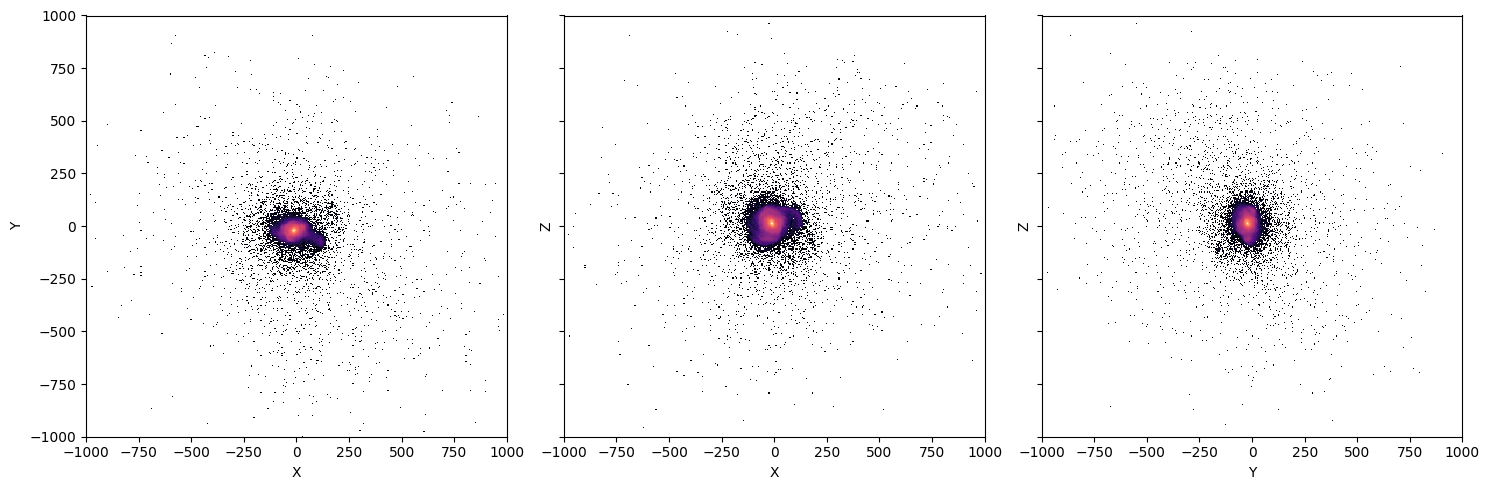

In [74]:
# plot 2D projections of the remnant onto three planes:

fig, axs = plt.subplots(1,3, figsize=(15,5), 
                        sharex=True, sharey=True)

# xy
# particle density histogram
axs[0].hist2d(rem_p[:,0].value, rem_p[:,1].value, 
              bins=500, norm=LogNorm(), cmap='magma')
# axis labels
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
# axis limits
axs[0].set_xlim(-1000, 1000)
axs[0].set_ylim(-1000, 1000)

# xz
# particle density histogram
axs[1].hist2d(rem_p[:,0].value, rem_p[:,2].value, 
              bins=500, norm=LogNorm(), cmap='magma')
# axis labels
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
# axis limits
axs[1].set_xlim(-1000, 1000)
axs[1].set_ylim(-1000, 1000)


# yz
# particle density histogram
axs[2].hist2d(rem_p[:,1].value, rem_p[:,2].value, 
              bins=500, norm=LogNorm(), cmap='magma')
# axis labels
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
# axis limits
axs[2].set_xlim(-1000, 1000)
axs[2].set_ylim(-1000, 1000)

fig.tight_layout()

# to do: make sure normalization is the same for all axes 
# and put a common colorbar on the right

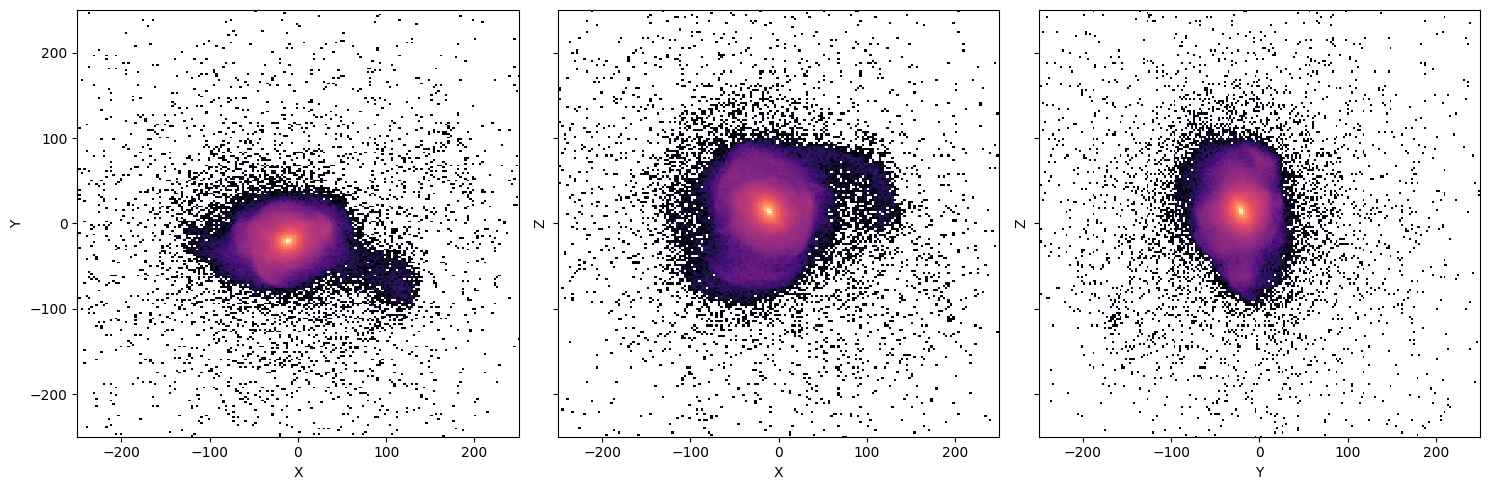

In [79]:
# same plot, but zoom in more

fig, axs = plt.subplots(1,3, figsize=(15,5), 
                        sharex=True, sharey=True)

# xy
# particle density histogram
axs[0].hist2d(rem_p[:,0].value, rem_p[:,1].value, 
              bins=1000, norm=LogNorm(), cmap='magma')
# axis labels
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
# axis limits
axs[0].set_xlim(-250, 250)
axs[0].set_ylim(-250, 250)

# xz
# particle density histogram
axs[1].hist2d(rem_p[:,0].value, rem_p[:,2].value, 
              bins=1000, norm=LogNorm(), cmap='magma')
# axis labels
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
# axis limits
axs[1].set_xlim(-250, 250)
axs[1].set_ylim(-250, 250)


# yz
# particle density histogram
axs[2].hist2d(rem_p[:,1].value, rem_p[:,2].value, 
              bins=1000, norm=LogNorm(), cmap='magma')
# axis labels
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
# axis limits
axs[2].set_xlim(-250, 250)
axs[2].set_ylim(-250, 250)

fig.tight_layout()

In [75]:
# write function to get density contours within specific r
def density_contours_r(r, xpos, ypos, nbins_x, nbins_y, ax=None, **contour_kwargs):
    '''
    Gets 1, 2, and 3 sigma density contours for particles
    within a given radius r.

    Parameters
    ----------
        r: `float`
            radius of evaluation
        xpos: `numpy.ndarray`
            x-axis positions
        ydata: `numpy.ndarray`
            y-axis positions
        nbins_x: `int`
            Number of bins along x dimension
        nbins_y: `int`
            Number of bins along y dimension
        ax: `matplotlib.Axes (optional)`
            if supplied, plot the contour to this axis. Otherwise, open a new figure
        contour_kwargs: `dict`
            kwargs to be passed to pyplot.contour()
    
    Returns
    -------
        contour: `matplotlib.contour.QuadContourSet`
            1, 2, & 3 sigma contours within r
    '''
    # get indices of particles within r
    radii = np.sqrt(xpos**2 + ypos**2)
    idxs = np.where(radii <= r)

    # get contours
    contour = density_contour(xpos[idxs], ypos[idxs], nbins_x, nbins_y, ax=None, **contour_kwargs)

    return contour

In [ ]:
# write function to find points closest to a given density contour
# based on some tolerance 

def find_closest(xpos, ypos, contour, tol):
    # FINISH LATER
    # know I need contour.allsegs[i][j][k] (ith level, jth element, kth vertex coordinates)
    pass

In [76]:
# write function to fit ellipse using least-squares method
# and extract the relevant geometrical parameters:
# semimajor axis (a), semiminor axis (b), 
# tilt from horizontal (theta), center (x0, y0)

def fit_ellipse(xpos, ypos):
    '''
    Fits a generic ellipse to the the given x & y positions
    using the least-squares methods and extracts the geometrical 
    parameters of the ellipse from the result. Ellipse is of the
    form: 
    alpha*x^2 + beta*xy + gamma*y^2 + eta*x + kappa*y + mu = 0
    
    Parameters
    ----------
        xpos: `numpy array`
            x-axis positions of the points to fit
        ypos: `numpy array`
            y-axis positions of the points to fit

    Returns
    -------
        a: `float`
            the semimajor axis
        b: `float`
            the semiminor axis
        x0: `float`
            the x-coordinate of the center
        y0: `float`
            the y-coordinate of the center
        theta: `float`
            the tilt angle with respect to
            the x-axis
    '''

    # solve least squares problem: minimizing |Av - b|^2 
    A = np.stack([xpos**2, xpos*ypos, ypos**2, xpos, ypos]).T
    b = np.ones_like(xpos)
    v = np.linalg.lstsq(A, b)[0].squeeze() # parameters of fit ellipse

    # extract ellipse fit parameters
    alpha, beta, gamma, eta, kappa, mu = v[0], v[1], v[2], v[3], v[4], v[5], v[6]

    # get geometrical parameters from fit
    # axes
    t1 = beta**2 - 4*alpha*gamma
    t2 = alpha*kappa**2 + gamma*eta**2 - beta*eta*kappa + t1*mu
    t3 = np.sqrt((alpha - gamma)**2 + beta**2)
    t4 = alpha + gamma
    
    a = - np.sqrt(2*t2*(t4 + t3))/t1
    b = - np.sqrt(2*t2*(t4 - t3))/t1

    # center coordinates
    t6 = 2*gamma*eta - beta*kappa
    t7 = 2*alpha*kappa - beta*eta

    x0 = t6/t1
    y0 = t7/t1

    # tilt angle
    theta = 0.5*np.arctan2(-beta, gamma-alpha)

    return a, b, x0, y0, theta

In [80]:
# write function to classify remnant morphology
# based on the lengths of the A, B, C axes

def approx(n, m, tol):
    '''
    Determines if two quantities are
    approximately equal within some
    tolerance in terms of percentage

    Parameters
    ----------
        n, m: `float-like`
            quantities to be compared

    Returns
    -------
        approx_equal: `bool`
            whether inputs are
            approximately equal

    '''
    if np.abs(n-m)/n <= tol:
        approx_equal = True
    else:
        approx_equal = False

    return approx_equal

def morphology(A, B, C, tol):
    '''
    Determines the shape of a 3D ellipsoid given 
    the lengths of its axes.

    Parameters
    ----------
        A: `float`
            z-axis of the ellipse
        B: `float`
            y-axis of the ellipse
        C: `float`
            x-axis of the ellipse
        tol: `float`
            how close in percentage
            two axes need to be to
            be approximately equal
    
    Returns
    -------
        shape: `string`
            shape of the ellipse
            (spheroid, oblate, prolate, triaxial)
        
    '''
    
    if approx(A,B,tol) & approx(B,C,tol) & approx(A,C,tol): # A ~ B ~ C
        shape = 'spheroid'

    elif approx(B,C,tol) & (min(B,C) > A): # B ~ C > A
        shape = 'oblate'

    elif (A > max(B,C)) & approx(B,C,tol) : # A > B ~ C
        shape = 'prolate'

    else: # all axes different lengths
        shape = 'triaxial'
    
    return shape

In [ ]:
# QUESTIONS:
# - is my method with the contours the right way to handle this?
# - is oblate/prolate only with respect to the axis of rotation?

In [ ]:
# let's work with the xy projection first

# choose some r - something relatively big for now, just to test

# get and plot density contours within r

In [ ]:
# choose density contour that best traces the shape of the galaxy 
# and not a circle with radius r

# get particles closest to the contour within some tolerance epsilon


In [ ]:
# fit the ellipse and get geometrical parameters

# plot ellipse to make sure it looks as good as it can


In [ ]:
# repeat above for xz 


In [ ]:
# and yz

In [ ]:
# now match the geometrical parameters of the projected ellipses to a 3D ellipse
# and take averages to get overall 3D ellipse parameters - specifically A, B, C axes


In [ ]:
# classify remnant morphology
